<a href="https://colab.research.google.com/github/Jannatul26/Jannatul26/blob/main/penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applied machine learning - basic project: Penguins data set**

 The aim of the project is classification of the Penguins to different species based on available attributes. The problem statement is to classify the species of the penguin, given the different predictor variables. Simplified data from original penguin data sets. Contains variables:

**Predictors:**

*species: penguin species (Chinstrap,
Adélie, or Gentoo)

*culmen_length_mm: culmen length (mm)

*culmen_depth_mm: culmen depth (mm)

*flipper_length_mm: flipper length (mm)
*body_mass_g: body mass (g)

*island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

*sex: penguin sexThe dataset contains the following predictors and targets.

**Target - Species:**

Adelie

Chinstrap

Gentoo

**Problem Type:**

**Supervised Learning:**
Supervised learning is a type of training the system by providing labelled inputs. While the system is trained with the input features, also the expected output. In this case, the system will be trained with predictors (independant variables) along with the target (dependant variable).

**Classification:**
Classification is a subset of supervised learning where the output or dependant variable is discrete. Here,'Species' feature as the target which is discrete.

Hence this is a classification problem. However this dataset can also be used to carry out clustering tasks as well. Clustering is not covered in this Project.

**Importing Libraries and Datasets**

The first thing to do is to import the required libraries.

The libraries which are used in this Kernel are,

Numpy - Matrices and Mathematical Functions
Pandas - Data Manipulation and Analysis
Matplotlib - Simple Visualization
Seaborn - More Sophisticated Visualizations
Scikit Learn - Machine Learning Algorithms and Evaluation Metrics

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #simple data visualization
%matplotlib inline
import seaborn as sns #some advanced data visualizations
import warnings
warnings.filterwarnings('ignore') # to get rid of warnings
plt.style.use('seaborn-white') #defining desired style of viz



# 1. Loading the data set

I'm loading my data set as a pandas data frame.  
My data set is availble on my github and I will load it from there. I use the read_csv() function which is part of the pandas library.

I am loading the dataset and store it in a variable. There will be a copy of the original dataset so that it can be rollbacked to the original version of the dataset whenever required.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Jannatul26/Jannatul26/main/penguins_size.csv')
original = df.copy()

# 2. Quick Inspection of the Data


*   Using the 'shape' atribute of the data frame containing the data set to see how many examples it contains.

In [ ]:
print('Dataset has', df.shape[0] , 'rows and', df.shape[1], 'columns')

Dataset has 344 rows and 7 columns


* Using 'info' attribute gives a concise summery about the data types of each column, the number of non-null values, and the memory usage. It helps to understand the data types and if there are any missing values in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


* 'describe' attribute is helpful to get an overview of the central tendencies and spread of the numerical features.

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


* To identify if there are any missing data that need to be handled before further analysis or modeling.

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

This data seems to have some missing values.

In [ ]:
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


#3. Exploratory Data Analysis

* **Univariate Analysis**

 To understand how the categorical variables are distributed, I'll use the value_counts() method with an argument 'normalize' set to True to see the result i terms of percentage.

In [ ]:
plt.rcParams['figure.figsize'] = (10,7)

* Calculating the percentage distribution of each penguin species in the dataset. The result is then plotted as a bar chart with species on the x-axis and percentage on the y-axis. The chart is labeled appropriately and displayed with the help of `matplotlib.pyplot.show()`

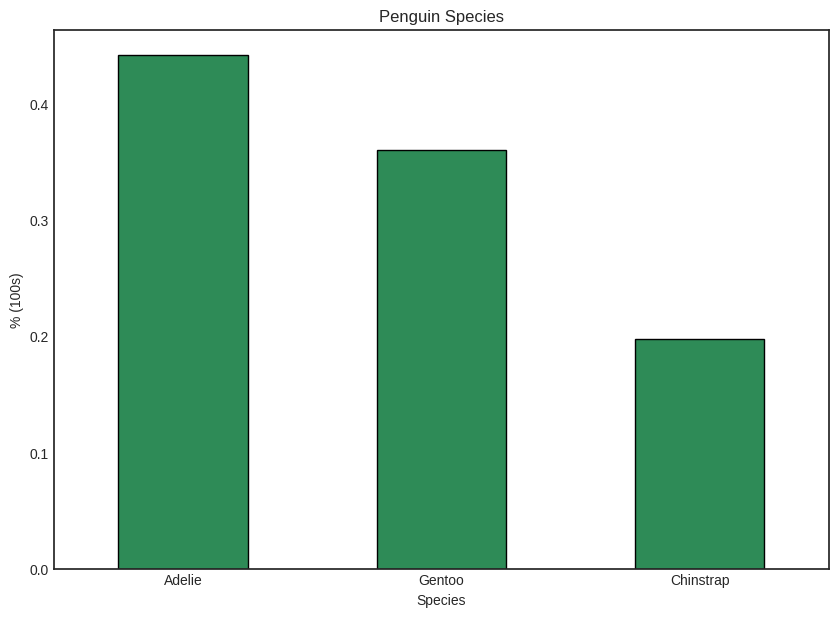

In [ ]:
df['species'].value_counts(normalize = True).plot(kind = 'bar', color = 'seagreen', linewidth = 1, edgecolor = 'k')
plt.title('Penguin Species')
plt.xlabel('Species')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

 * Calculating the percentage distribution of penguins living on each island in the dataset. The result is then plotted as a bar chart with islands on the x-axis and percentage on the y-axis. The chart is labeled appropriately with a title, axis labels, and rotated x-axis labels for better readability.

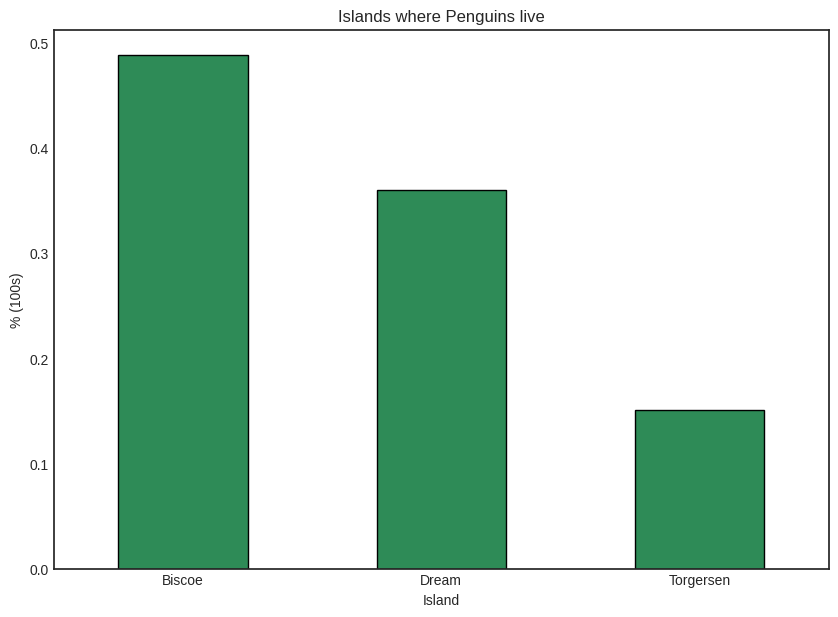

In [ ]:
df['island'].value_counts(normalize = True).plot(kind = 'bar', color = 'seagreen', linewidth = 1, edgecolor = 'k')
plt.title('Islands where Penguins live')
plt.xlabel('Island')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

* Calculate the percentage distribution of male and female penguins in the dataset. The result is then plotted as a bar chart with "sex" categories on the x-axis and percentage on the y-axis.

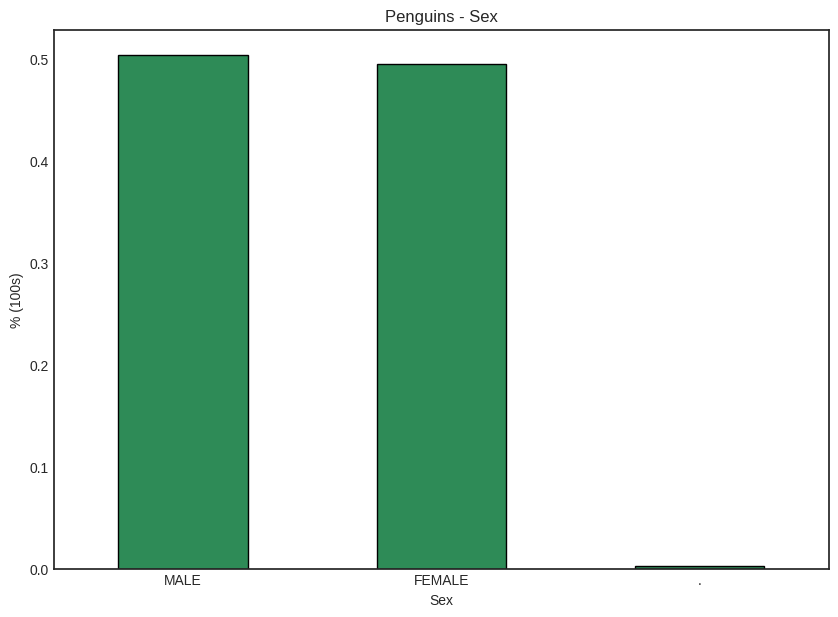

In [ ]:
df['sex'].value_counts(normalize = True).plot(kind = 'bar', color = 'seagreen', linewidth = 1, edgecolor = 'k')
plt.title('Penguins - Sex')
plt.xlabel('Sex')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

The third bar in this graph shows the inconsistency in this feature. This would be treated in the upcoming sections.



# 4. Numerical features

I could use histograms, but it suffers from binning bias. I would go with the Probability Density Function which says the probability of a random variable x picked at a time. Since the variable is continuous, we have chosen PDF.

We also have something called Empirical Cumulative Distribution Function, which says the probability of getting a value less than or equal to a random value picked at a time. Simple! This is a cumulative distribution function basically, except the fact that the CDF works on samples whereas the ECDF works on the real data.

 A simple function which can plot both ECDF and PDF:

In [ ]:
def ecdf(x):
    n = len(x)
    a = np.sort(x)
    b = np.arange(1, 1 + n) / n
    plt.subplot(211)
    plt.plot(a, b, marker = '.', linestyle = 'None', c = 'seagreen')
    mean_x = np.mean(x)
    plt.axvline(mean_x, c = 'k', label = 'Mean')
    plt.title('ECDF')
    plt.legend()
    plt.show()
    plt.subplot(212)
    sns.distplot(x, color = 'r')
    plt.title('Probability Density Function')
    plt.show()

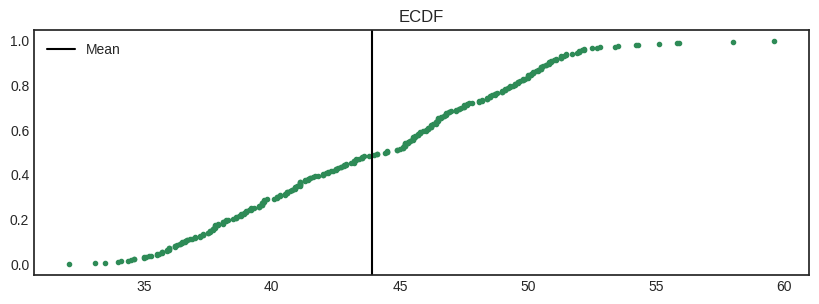

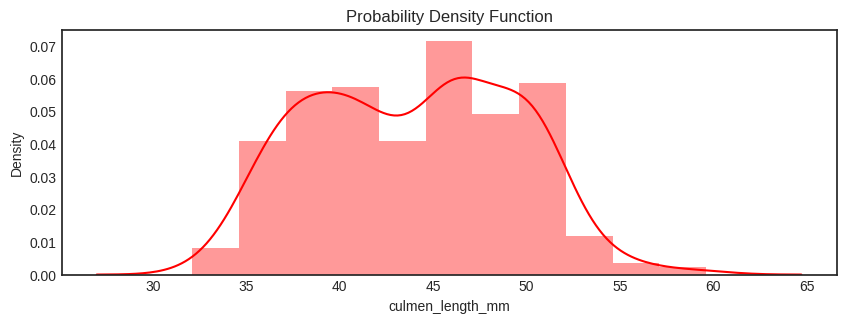

In [ ]:
ecdf(df['culmen_length_mm'])

ECDF shows a black line there. It is the mean value of this feature, which is at 44 and the value in y-axis is around 0.5.

 The probability of getting a value less than the mean culmen length is 0.5!

Quite interesting right?

 The probability of getting a value less than the culmen length 40mm is around 0.2, which means there is only a 20% chance of the culmen length to be less than 40mm if it is randomly picked a value.


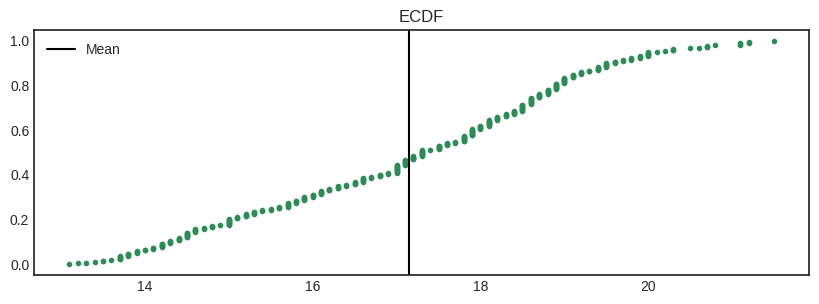

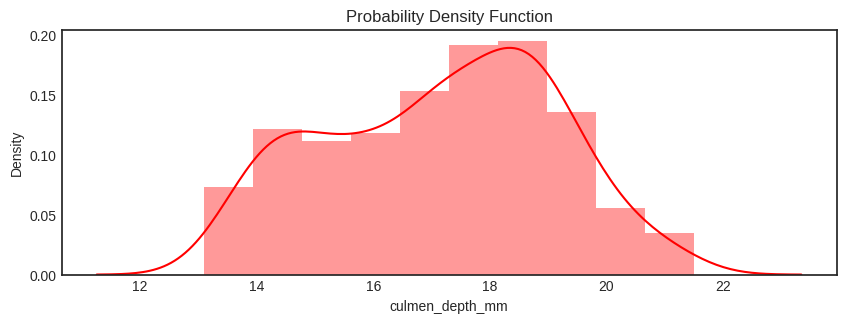

In [ ]:
ecdf(df['culmen_depth_mm'])

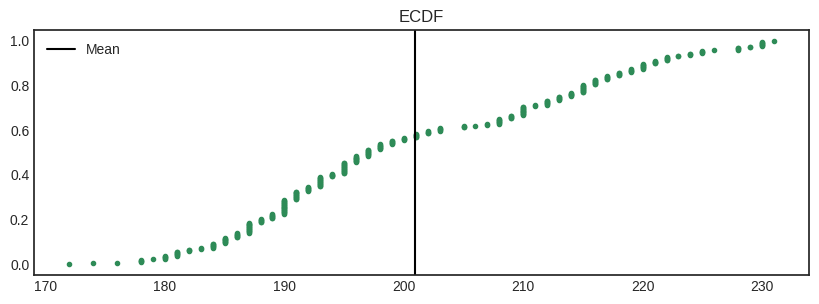

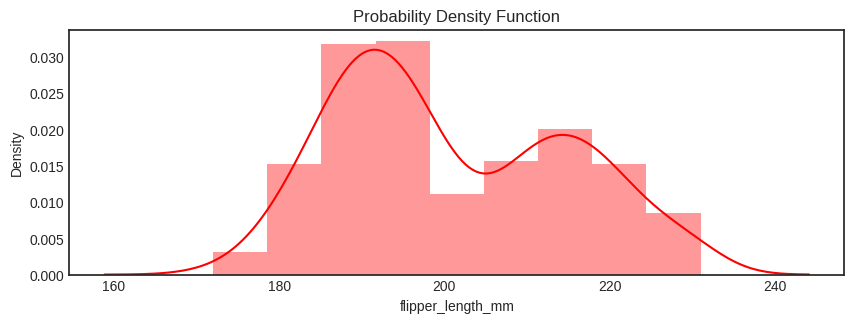

In [ ]:
ecdf(df['flipper_length_mm'])

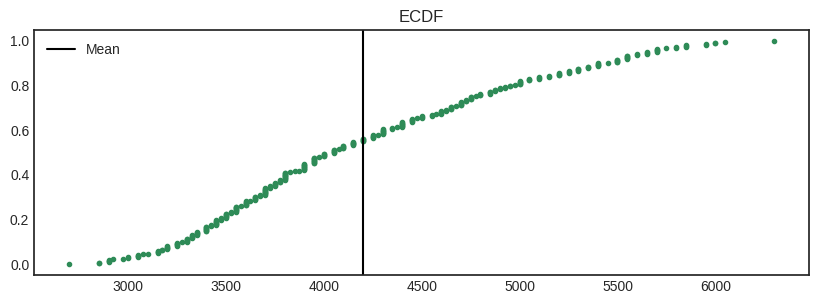

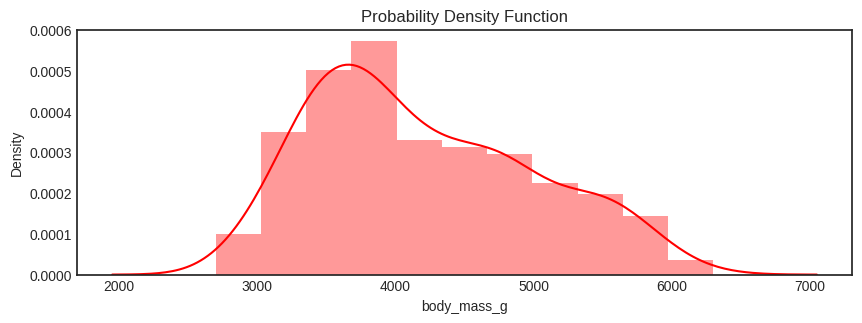

In [ ]:
ecdf(df['body_mass_g'])

# Multivariate Analysis

As the distribution of every features have been analyzed,now analyzing the relationship between them. A simple function which plots the boxplot of features which is classified by the species and their sex.

This is a great way to check how the features vary for different sex and species.

In [ ]:
def box(f):
    sns.boxplot(y = f, x = 'species', hue = 'sex',data = df)
    plt.title(f)
    plt.show()

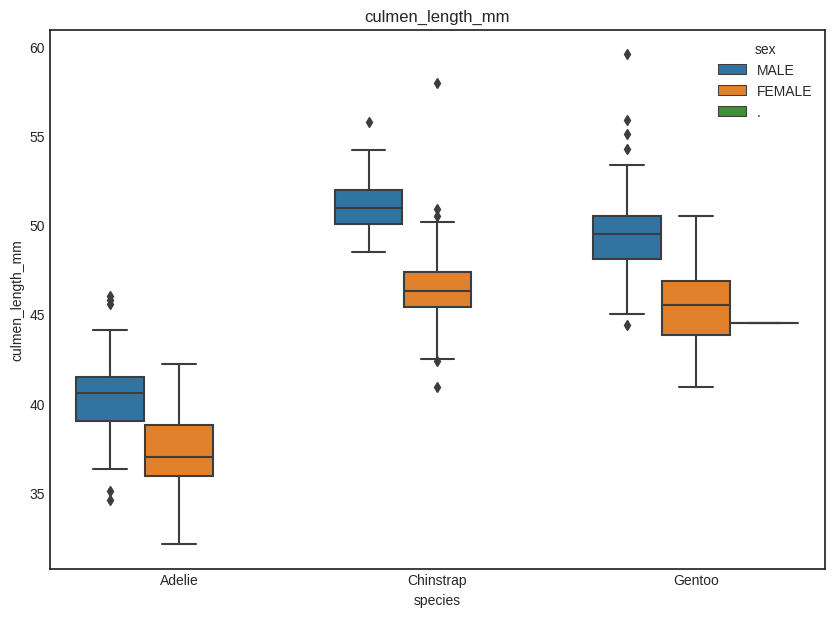

In [ ]:
box('culmen_length_mm')

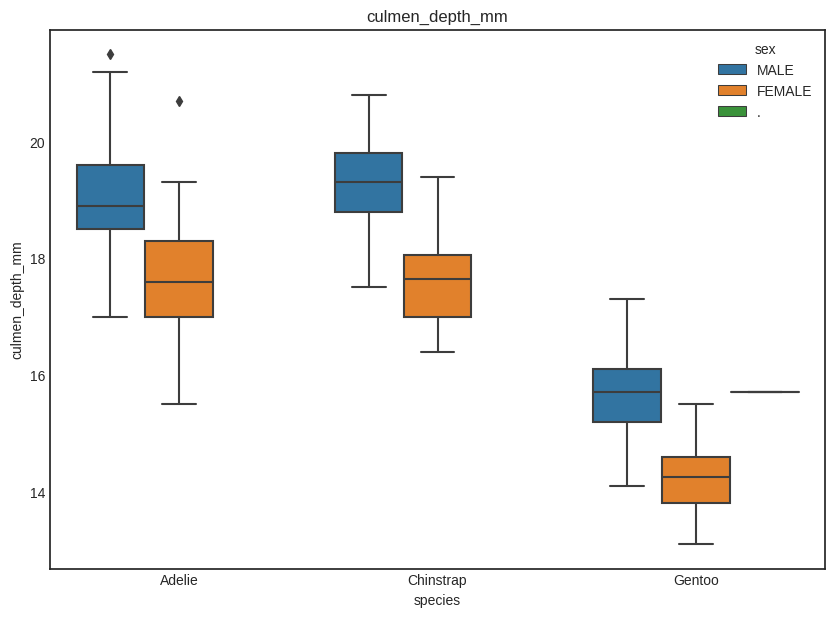

In [ ]:
box('culmen_depth_mm')

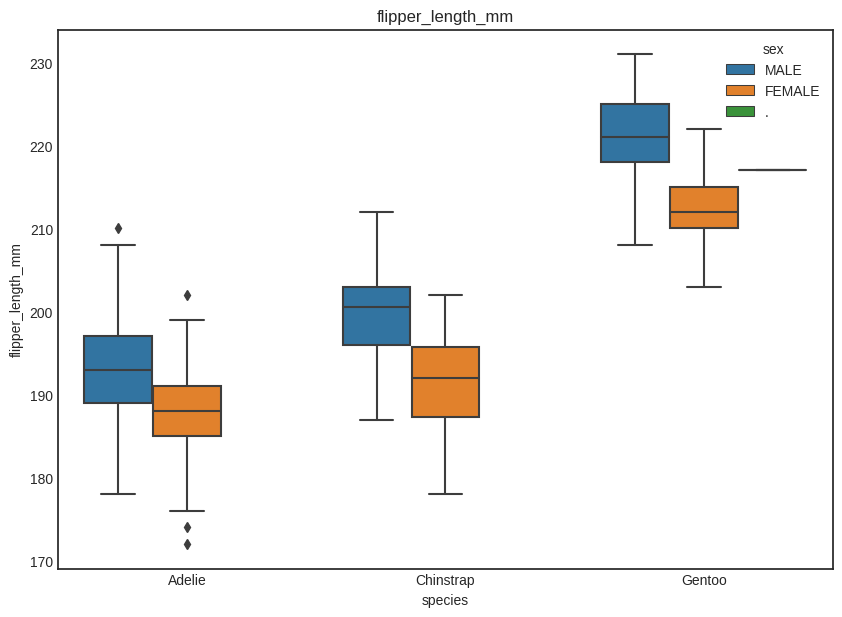

In [ ]:
box('flipper_length_mm')

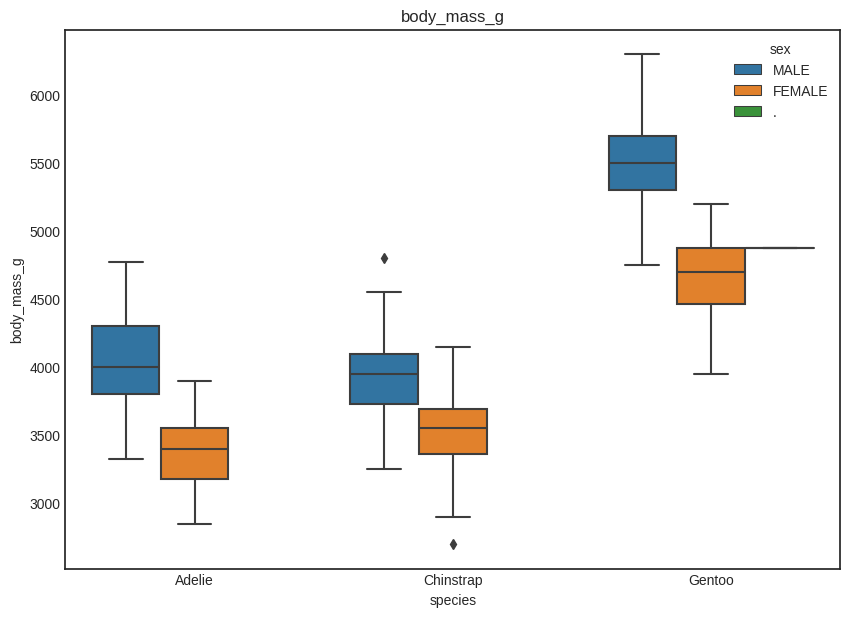

In [ ]:
box('body_mass_g')

A common thing which I noticed from all the above graphs is that the male penguins have more culmen length, depth, flipper length and body mass irrespective of their species. This would help us immensely during our modelling.

Now, plotting a pairplot to see the multivariate trends all at the same time.

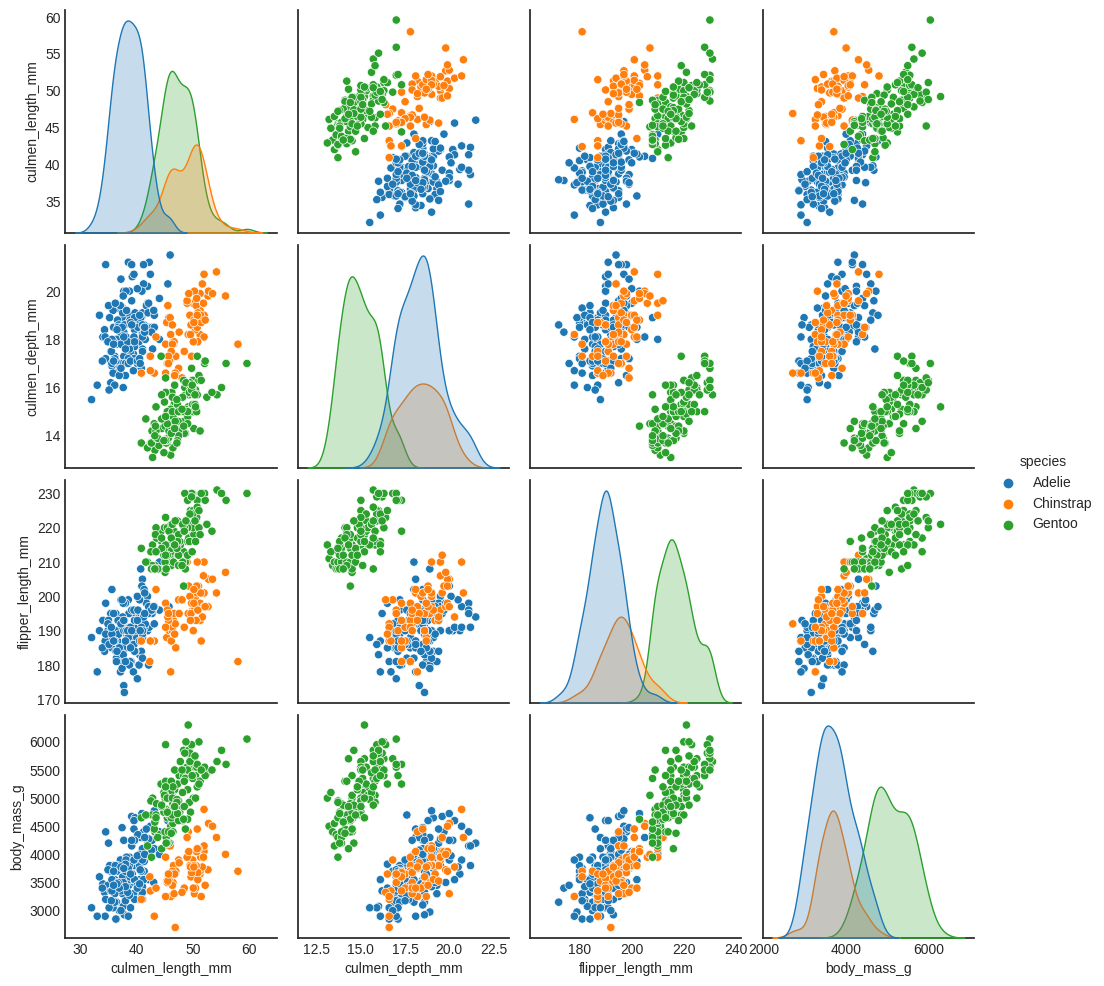

In [ ]:
sns.pairplot(df, hue = 'species')
plt.show()

#5.  Missing Values Treatment

As earlier, there were some missing values in the original dataset.

Since the missing values are negligible in number, the most common imputation strategies are - mean and mode. For numeric variables, I would use the mean technique and for cateogorical variables mode is used.

In [ ]:
new_df = original.copy()

new_df['culmen_length_mm'].fillna(np.mean(original['culmen_length_mm']), inplace = True)
new_df['culmen_depth_mm'].fillna(np.mean(original['culmen_depth_mm']), inplace = True)
new_df['flipper_length_mm'].fillna(np.mean(original['flipper_length_mm']), inplace = True)
new_df['body_mass_g'].fillna(np.mean(original['body_mass_g']), inplace = True)
new_df['sex'].fillna(original['sex'].mode()[0], inplace = True)

In [ ]:
new_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [ ]:
new_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Now I have got rid of all the missing values and moving ahead to the feature transformation.

# 6. Feature Transformation
Now I'll check whether the dataset is skewed. As I have noticed from the density plots of the numeric variables, there was not seen any normal distribution. But I'll check the skewnesss of the features once. If the skewness is more, the variables can transformed using np.sqrt, np.log etc.

In [ ]:
print('Skewness of numeric variables')
print('-' * 35)

for i in new_df.select_dtypes(['int64', 'float64']).columns.tolist():
    print(i, ' : ',new_df[i].skew())

Skewness of numeric variables
-----------------------------------
culmen_length_mm  :  0.053271788831634054
culmen_depth_mm  :  -0.14387980683507487
flipper_length_mm  :  0.34668222408256033
body_mass_g  :  0.47169044722118986


I do not see that the data is highly skewed.

* Normalization

The reason being, the scale of every feature in the dataset is different. I noticed this during the inspection of the dataset at an initial stage. This is something to be treated.

I've chosen MinMaxScaler for this exercise. This scales the values in the particular feature such that they lie within 0 and 1. This makes the dataset to have the same range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [ ]:
new_df['culmen_length_mm'] = mms.fit_transform(new_df['culmen_length_mm'].values.reshape(-1, 1))
new_df['culmen_depth_mm'] = mms.fit_transform(new_df['culmen_depth_mm'].values.reshape(-1, 1))
new_df['flipper_length_mm'] = mms.fit_transform(new_df['flipper_length_mm'].values.reshape(-1, 1))
new_df['body_mass_g'] = mms.fit_transform(new_df['body_mass_g'].values.reshape(-1, 1))

In [ ]:
new_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,MALE
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,FEMALE
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,FEMALE
3,Adelie,Torgersen,0.429888,0.482282,0.490088,0.417154,MALE
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,FEMALE


Now the dataset seems to have normalized, let's check this by seeing the summary stats of the data.

In [ ]:
new_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,0.429888,0.482282,0.490088,0.417154
std,0.197951,0.234408,0.237638,0.222115
min,0.000000,0.000000,0.000000,0.000000
25%,0.260909,0.297619,0.305085,0.236111
50%,0.441818,0.500000,0.423729,0.375000
75%,0.596364,0.666667,0.694915,0.569444
max,1.000000,1.000000,1.000000,1.000000


 The mean is now in the same range, also the min and max of every variable are 0 and 1. So the dataset is now normalized.

There are categorical variables in the dataset. I'll use get_dummies function to create dummy variables, as these variables can't be randomly assigned any values.

In [ ]:
new_df_dummy = pd.get_dummies(new_df, columns = ['sex', 'island'], drop_first = True)

In [ ]:
new_df_dummy['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
new_df_dummy['species'].replace({'Adelie' : 0,
                                'Chinstrap' : 1,
                                'Gentoo': 2}, inplace = True)

<Axes: >

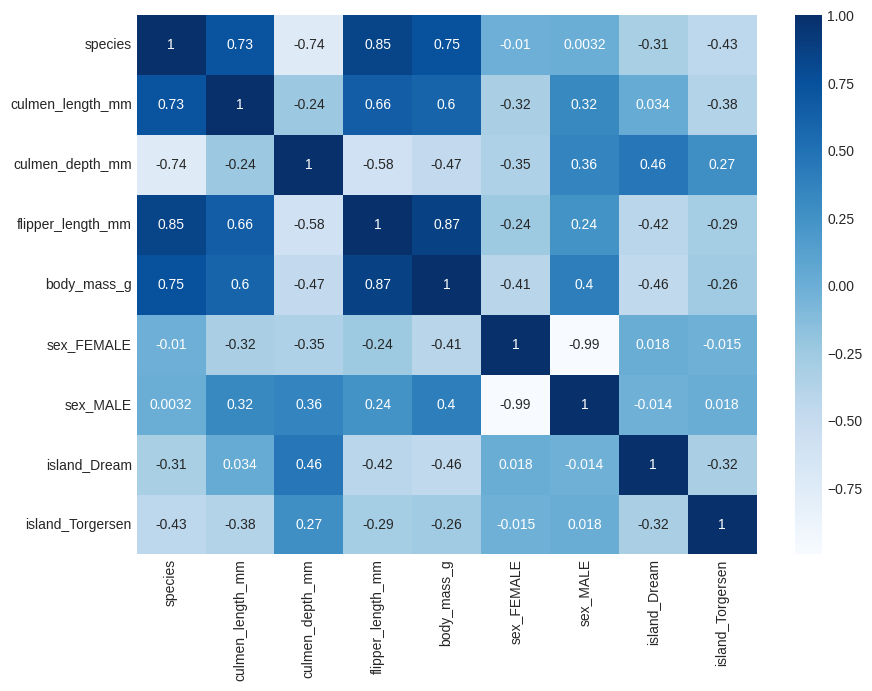

In [ ]:
sns.heatmap(new_df_dummy.corr(), annot = True, cmap = 'Blues')

# 7. Model Building

Since everything is all set, for starting the modelling, I'll import the required machine learning libraries and evaluation metrics from sklearn.

Then I'll separate the independant and dependant variables before splitting them into train and test sets using train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
X = new_df_dummy.drop(columns = ['species', 'sex_FEMALE', 'sex_MALE'])
Y = new_df_dummy['species']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

first try with a simple Logistic Regression model.

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

pred = LR.predict(X_test)

In [ ]:
print('Accuracy : ', accuracy_score(Y_test, pred))
print('F1 Score : ', f1_score(Y_test, pred, average = 'weighted'))

Accuracy :  1.0
F1 Score :  1.0


Performing cross-validation with various models and then select the best-performing model based on the results.

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))

In [ ]:
for name, model in models:
    kfold = KFold(n_splits = 5)
    cv_res = cross_val_score(model, X_train, Y_train, scoring = 'accuracy', cv = kfold)
    print(name, ' : ', cv_res.mean())

LR  :  0.9846153846153847
DT  :  0.9534690799396681
RF  :  0.9573906485671191
kNN  :  0.9846153846153847
SVC  :  0.9961538461538462


In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)

pred = LR.predict(X_test)

# 8. Model Evaluation

In [ ]:
print('Accuracy : ', accuracy_score(Y_test, pred))
print('F1 Score : ', f1_score(Y_test, pred, average = 'weighted'))
print('Precision : ', precision_score(Y_test, pred , average = 'weighted'))
print('Recall : ', recall_score(Y_test, pred, average = 'weighted'))

Accuracy :  1.0
F1 Score :  1.0
Precision :  1.0
Recall :  1.0


In [ ]:
confusion_matrix(Y_test, pred)

array([[39,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 28]])

Analysis and modeling performed on the penguin dataset demonstrated successful classification of penguin species using the Support Vector Classifier (SVC). The SVC model achieved high accuracy, precision, recall and F1 scores, indicating its effectiveness in discriminating between different species. Feature engineering and hyperparameter tuning are suggested as potential avenues for improvement. In addition, the project emphasized the importance of data exploration and visualization to better understand the distribution and relationships between variables. The availability of a limited number of samples with missing values ​​promoted the use of inductive techniques, while the normalization process was applied to normalize numerical features. Overall, the project has provided valuable insights into the application of basic machine learning techniques to species classification, creating opportunities for future exploration through clustering algorithms and computational techniques. additional capabilities.